Vraj Patel

Coding Practice project for ANN tuning.

The dataset used here is custom scraped by me for another project. The data and previous project can be found here: https://github.com/VrajPatel105/Massachusetts-Housing-Recommender-System

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("/content/housing_data_after_feature_selection.csv")

In [3]:
df.head()

,Unnamed: 0,url,image_url,beds,baths,sqft,address,property_type,region,parking_total_spaces,walk_score,middle_school_distance,wind_risk,nearby_cities,zip_code,mobility_score,parking_quality_score,has_garage,county,price_volatility,price_reduction_total,price
0,0,https://www.zillow.com/homedetails/197-Lowell-...,https://photos.zillowstatic.com/fp/90454dcdc33...,3.0,2.0,1415.0,"197 Lowell St, Arlington, MA 02474",single family,Arlington,4.0,81.0,0.4,6.0,"Arlington, Cambridge, Everett, Framingham, Lowell",2474,73.0,0.0,0,Middlesex,190775.778337,481500.0,999000
1,1,https://www.zillow.com/homedetails/225-Mystic-...,https://photos.zillowstatic.com/fp/e92a0b0b33e...,2.0,1.0,1064.0,"225 Mystic St, Arlington, MA 02474",single family,Arlington,3.0,69.0,0.1,6.0,"Arlington, Cambridge, Everett, Framingham, Lowell",2474,65.0,1.0,0,Middlesex,75258.487893,189000.0,799000
2,2,https://www.zillow.com/homedetails/43-Longmead...,https://photos.zillowstatic.com/fp/740e93bfcff...,2.0,1.0,1628.0,"43 Longmeadow Rd, Arlington, MA 02474",single family,Arlington,5.0,32.0,0.2,6.0,"Arlington, Cambridge, Everett, Framingham, Lowell",2474,33.2,0.0,0,Middlesex,379500.000000,759000.0,899000
3,3,https://www.zillow.com/homedetails/11-Pine-Ct-...,https://photos.zillowstatic.com/fp/bb84e595f96...,3.0,2.0,1824.0,"11 Pine Ct, Arlington, MA 02476",single family,Arlington,2.0,84.0,0.7,6.0,"Arlington, Cambridge, Everett, Framingham, Lowell",2476,72.0,0.0,0,Middlesex,358034.448994,815000.0,998000
4,4,https://www.zillow.com/homedetails/17-Norcross...,https://photos.zillowstatic.com/fp/ac474eb496d...,2.0,2.0,1221.0,"17 Norcross St FLOOR 3, Arlington, MA 02474",condo,Arlington,1.0,77.0,0.1,6.0,"Arlington, Cambridge, Everett, Framingham, Lowell",2474,84.6,1.0,0,Middlesex,16004.999219,-47000.0,668000


In [4]:
df.drop(columns=['Unnamed: 0','url','image_url','address','nearby_cities','zip_code'], inplace=True)

In [5]:
df.head()

,beds,baths,sqft,property_type,region,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,county,price_volatility,price_reduction_total,price
0,3.0,2.0,1415.0,single family,Arlington,4.0,81.0,0.4,6.0,73.0,0.0,0,Middlesex,190775.778337,481500.0,999000
1,2.0,1.0,1064.0,single family,Arlington,3.0,69.0,0.1,6.0,65.0,1.0,0,Middlesex,75258.487893,189000.0,799000
2,2.0,1.0,1628.0,single family,Arlington,5.0,32.0,0.2,6.0,33.2,0.0,0,Middlesex,379500.000000,759000.0,899000
3,3.0,2.0,1824.0,single family,Arlington,2.0,84.0,0.7,6.0,72.0,0.0,0,Middlesex,358034.448994,815000.0,998000
4,2.0,2.0,1221.0,condo,Arlington,1.0,77.0,0.1,6.0,84.6,1.0,0,Middlesex,16004.999219,-47000.0,668000


In [6]:
df['property_type'].unique()

array(['single family', 'condo', 'townhouse'], dtype=object)

we will apply one hot encoding for this property_type column

In [7]:
df_encoded = pd.get_dummies(df, columns=['property_type','county'], drop_first=True)

In [8]:
df_encoded

,beds,baths,sqft,region,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester
0,3.0,2.0,1415.0,Arlington,4.0,81.0,0.4,6.0,73.0,0.0,0,190775.778337,481500.0,999000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2.0,1.0,1064.0,Arlington,3.0,69.0,0.1,6.0,65.0,1.0,0,75258.487893,189000.0,799000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2.0,1.0,1628.0,Arlington,5.0,32.0,0.2,6.0,33.2,0.0,0,379500.000000,759000.0,899000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,3.0,2.0,1824.0,Arlington,2.0,84.0,0.7,6.0,72.0,0.0,0,358034.448994,815000.0,998000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2.0,2.0,1221.0,Arlington,1.0,77.0,0.1,6.0,84.6,1.0,0,16004.999219,-47000.0,668000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,10.0,4.0,3150.0,Springfield,4.0,74.0,0.4,6.0,65.2,4.0,1,184596.125095,370150.0,439900,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7788,2.0,1.0,768.0,Springfield,2.0,59.0,0.3,5.0,54.2,2.5,1,51047.428926,109000.0,229000,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7789,3.0,1.0,966.0,Springfield,4.0,17.0,0.3,5.0,21.8,1.0,0,4898.979486,-10000.0,289900,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7790,3.0,1.0,1136.0,Springfield,4.0,64.0,0.4,6.0,57.2,0.0,0,0.000000,0.0,207400,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [9]:
cols = [
    "property_type_single family",
    "property_type_townhouse",
    "county_Berkshire",
    "county_Bristol",
    "county_Dukes",
    "county_Essex",
    "county_Franklin",
    "county_Hampden",
    "county_Hampshire",
    "county_Middlesex",
    "county_Nantucket",
    "county_Norfolk",
    "county_Other",
    "county_Plymouth",
    "county_Suffolk",
    "county_Worcester",
]

df_encoded[cols] = df_encoded[cols].astype(int)

In [10]:
df_encoded.head()

,beds,baths,sqft,region,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester
0,3.0,2.0,1415.0,Arlington,4.0,81.0,0.4,6.0,73.0,0.0,0,190775.778337,481500.0,999000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2.0,1.0,1064.0,Arlington,3.0,69.0,0.1,6.0,65.0,1.0,0,75258.487893,189000.0,799000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1.0,1628.0,Arlington,5.0,32.0,0.2,6.0,33.2,0.0,0,379500.000000,759000.0,899000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.0,2.0,1824.0,Arlington,2.0,84.0,0.7,6.0,72.0,0.0,0,358034.448994,815000.0,998000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,2.0,1221.0,Arlington,1.0,77.0,0.1,6.0,84.6,1.0,0,16004.999219,-47000.0,668000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [11]:
df['region'].unique()

array(['Arlington', 'Norton', 'Raynham', 'Rehoboth', 'Acushnet',
       'New Bedford', 'Fairhaven', 'Somerset', 'Taunton', 'Assonet',
       'Dighton', 'Dartmouth', 'Berkley', 'Mansfield', 'Attleboro',
       'Fall River', 'South Easton', 'Westport', 'North Attleboro',
       'Seekonk', 'Swansea', 'North Easton', 'East Freetown',
       'South Dartmouth', 'North Dartmouth', 'East Taunton', 'Malden',
       'Foxboro', 'Plymouth', 'Danvers', 'Hopkinton', 'Wilmington',
       'Chilmark', 'Monson', 'Plainville', 'Scituate', 'Gloucester',
       'Burlington', 'Hopedale', 'Athol', 'Templeton', 'Boston',
       'Leominster', 'Stoughton', 'Wellfleet', 'Barre', 'Hudson',
       'Shrewsbury', 'Framingham', 'Centerville', 'Randolph', 'Weymouth',
       'Harwich Port', 'Phillipston', 'Chatham', 'Dedham', 'Allston',
       'Hyde Park', 'Marshfield', 'Gardner', 'Milford', 'Edgartown',
       'Wenham', 'East Falmouth', 'Sturbridge', 'Pembroke', 'Stoneham',
       'Woburn', 'Belmont', 'Wareham', 'West

In [12]:
freq_map = df_encoded['region'].value_counts().to_dict()
df_encoded['region_freq'] = df_encoded['region'].map(freq_map)

In [13]:
df_encoded.sample(20)

,beds,baths,sqft,region,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
5624,5.0,7.0,8033.0,Westwood,2.0,5.0,1.2,6.0,12.6,5.5,1,0.000000,0.0,8500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
3368,5.0,5.0,3432.0,Lexington,2.0,22.0,0.4,6.0,24.8,4.0,1,27500.000000,-55000.0,2295000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,53
170,5.0,2.0,1404.0,Taunton,6.0,67.0,2.3,6.0,58.2,2.5,1,103307.308551,279000.0,429000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,55
5348,4.0,2.0,2332.0,Walpole,4.0,23.0,0.4,6.0,21.8,2.5,1,0.000000,0.0,799000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
2520,1.0,1.0,570.0,Boston,1.0,84.0,0.3,6.0,78.8,0.0,0,15000.000000,-40000.0,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,436
2441,4.0,5.0,3082.0,Boston,4.0,97.0,0.2,6.0,90.6,1.0,0,591048.973342,-1405000.0,2195000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,436
6188,4.0,3.0,2322.0,Salem,2.0,2.0,1.2,6.0,4.0,3.0,1,0.000000,0.0,999900,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,64
5744,4.0,2.0,2281.0,Foxboro,8.0,73.0,0.4,6.0,62.2,1.0,0,424949.500000,849899.0,849900,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12
2117,4.0,3.0,1915.0,Lynn,2.0,61.0,0.3,6.0,53.4,1.0,0,160263.863376,320100.0,630000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90
6848,1.0,1.0,600.0,Lanesborough,1.0,34.0,1.3,4.0,31.2,0.0,0,0.000000,0.0,159900,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24


In [14]:
df_encoded.drop(columns=["region"], inplace=True)

In [15]:
df_encoded.head()

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
0,3.0,2.0,1415.0,4.0,81.0,0.4,6.0,73.0,0.0,0,190775.778337,481500.0,999000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
1,2.0,1.0,1064.0,3.0,69.0,0.1,6.0,65.0,1.0,0,75258.487893,189000.0,799000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
2,2.0,1.0,1628.0,5.0,32.0,0.2,6.0,33.2,0.0,0,379500.000000,759000.0,899000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
3,3.0,2.0,1824.0,2.0,84.0,0.7,6.0,72.0,0.0,0,358034.448994,815000.0,998000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
4,2.0,2.0,1221.0,1.0,77.0,0.1,6.0,84.6,1.0,0,16004.999219,-47000.0,668000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38


need to round up values

In [16]:
df_encoded['price_volatility'] = df_encoded['price_volatility'].apply(np.ceil)

In [17]:
df_encoded.sample(5)

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
1616,1.0,1.0,440.0,1.0,88.0,0.1,6.0,75.6,0.0,0,0.0,0.0,474900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,436
5105,4.0,2.0,1200.0,1.0,37.0,0.2,6.0,44.6,1.0,0,535641.0,947600.0,950000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14
6251,2.0,2.0,1567.0,1.0,30.0,1.4,6.0,33.2,1.5,1,102825.0,205650.0,565000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18
7404,3.0,2.0,1704.0,6.0,5.0,4.1,5.0,13.4,4.0,1,71855.0,100000.0,449900,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8
3814,3.0,3.0,3552.0,6.0,4.0,1.9,6.0,8.0,5.5,1,13671.0,-40100.0,634900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12


In [18]:
df_encoded.sample(20)

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
2132,3.0,2.0,1309.0,5.0,35.0,0.3,6.0,32.4,1.0,0,241141.0,515000.0,620000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90
2583,2.0,2.0,1848.0,2.0,1.0,3.5,8.0,10.6,3.0,1,0.0,0.0,2150000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63
4428,3.0,3.0,1872.0,4.0,5.0,1.5,8.0,11.8,0.0,0,208617.0,563000.0,1195000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,222
1960,2.0,2.0,1019.0,1.0,99.0,0.4,6.0,89.0,1.5,1,74875.0,176000.0,1425000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,436
1775,3.0,2.0,1239.0,2.0,83.0,0.2,6.0,82.6,0.0,0,39993.0,29000.0,799000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,26
823,3.0,3.0,2500.0,7.0,31.0,0.5,6.0,34.6,2.5,1,386000.0,772000.0,1050000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,40
5202,4.0,3.0,2024.0,1.0,83.0,0.2,6.0,82.2,0.0,0,0.0,0.0,1098000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51
993,6.0,4.0,4484.0,6.0,25.0,0.7,6.0,32.2,4.0,1,642348.0,1195000.0,3895000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15
1064,4.0,4.0,3150.0,2.0,84.0,0.2,6.0,82.0,0.0,0,0.0,0.0,1848000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,153
5865,5.0,6.0,9459.0,6.0,9.0,0.9,6.0,12.2,5.5,1,0.0,0.0,2495000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,52


Changing the name of the dataframe for convenience

df_encoded -> df

In [19]:
df = df_encoded

In [20]:
df.head()

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
0,3.0,2.0,1415.0,4.0,81.0,0.4,6.0,73.0,0.0,0,190776.0,481500.0,999000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
1,2.0,1.0,1064.0,3.0,69.0,0.1,6.0,65.0,1.0,0,75259.0,189000.0,799000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
2,2.0,1.0,1628.0,5.0,32.0,0.2,6.0,33.2,0.0,0,379500.0,759000.0,899000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
3,3.0,2.0,1824.0,2.0,84.0,0.7,6.0,72.0,0.0,0,358035.0,815000.0,998000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
4,2.0,2.0,1221.0,1.0,77.0,0.1,6.0,84.6,1.0,0,16005.0,-47000.0,668000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38


In [21]:
df.shape

(7792, 30)

# Final preprocessing

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns

Index(['beds', 'baths', 'sqft', 'parking_total_spaces', 'walk_score',
       'middle_school_distance', 'wind_risk', 'mobility_score',
       'parking_quality_score', 'has_garage', 'price_volatility',
       'price_reduction_total', 'price', 'property_type_single family',
       'property_type_townhouse', 'county_Berkshire', 'county_Bristol',
       'county_Dukes', 'county_Essex', 'county_Franklin', 'county_Hampden',
       'county_Hampshire', 'county_Middlesex', 'county_Nantucket',
       'county_Norfolk', 'county_Other', 'county_Plymouth', 'county_Suffolk',
       'county_Worcester', 'region_freq'],
      dtype='object')

In [24]:
df.corr()

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price_volatility,price_reduction_total,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
beds,1.000000,0.730511,0.651913,0.354886,-0.221662,0.055261,0.008195,-0.216832,0.334179,0.237217,0.317006,0.206420,0.436263,0.501947,-0.127238,0.038084,0.005871,0.045487,-0.010815,-0.005811,0.004447,-0.005064,0.046370,0.143393,0.070950,-0.009504,-0.027813,-0.190878,0.019971,-0.148334
baths,0.730511,1.000000,0.788090,0.307209,-0.182604,0.072333,0.089459,-0.159281,0.396122,0.304192,0.453674,0.301051,0.629975,0.264284,0.013996,-0.000676,-0.032340,0.049279,-0.014144,-0.025920,-0.088439,0.004108,0.075514,0.192306,0.101409,-0.028580,-0.015308,-0.113181,-0.041131,-0.005340
sqft,0.651913,0.788090,1.000000,0.422161,-0.211586,0.084517,0.020137,-0.200322,0.571029,0.278794,0.405783,0.221918,0.564692,0.299943,-0.067656,0.011854,-0.017551,0.032931,0.005150,0.034581,-0.052680,0.007796,0.059661,0.074448,0.093754,-0.014711,-0.003981,-0.125524,-0.013670,-0.059572
parking_total_spaces,0.354886,0.307209,0.422161,1.000000,-0.344584,0.176990,0.010573,-0.349646,0.477553,0.184992,0.128731,0.087114,0.171763,0.418943,-0.167806,-0.013628,0.043459,-0.004594,0.014701,0.066452,0.040316,0.020197,-0.063317,0.006946,0.023586,0.047762,0.052485,-0.219223,0.101223,-0.222299
walk_score,-0.221662,-0.182604,-0.211586,-0.344584,1.000000,-0.489179,-0.108211,0.973739,-0.262792,-0.253133,-0.012525,-0.044615,-0.015410,-0.482057,0.106100,-0.151700,-0.082532,-0.022333,0.029047,-0.082245,-0.039311,-0.027371,0.209636,-0.078674,0.040765,-0.089924,-0.168969,0.490159,-0.143975,0.461264
middle_school_distance,0.055261,0.072333,0.084517,0.176990,-0.489179,1.000000,0.124462,-0.474143,0.099912,0.071756,0.019308,0.016956,0.029270,0.212365,-0.067908,0.152213,0.035029,0.010571,-0.045525,0.065169,-0.030575,0.032287,-0.181580,0.054430,-0.104263,0.083854,0.107559,-0.248042,0.042535,-0.188398
wind_risk,0.008195,0.089459,0.020137,0.010573,-0.108211,0.124462,1.000000,-0.074203,-0.016090,-0.027894,0.103367,0.098125,0.154905,0.013802,0.012025,-0.538288,0.102046,0.048272,0.057193,-0.239937,-0.218789,-0.043972,-0.107851,0.198201,-0.068337,-0.054075,0.381716,-0.070809,-0.119993,0.020345
mobility_score,-0.216832,-0.159281,-0.200322,-0.349646,0.973739,-0.474143,-0.074203,1.000000,-0.269886,-0.266103,0.016804,-0.024079,0.023242,-0.496151,0.094893,-0.171830,-0.069323,-0.015729,-0.008857,-0.093248,-0.053024,-0.027607,0.223881,-0.026907,0.045161,-0.090395,-0.175966,0.515606,-0.172560,0.501906
parking_quality_score,0.334179,0.396122,0.571029,0.477553,-0.262792,0.099912,-0.016090,-0.269886,1.000000,0.623822,0.117348,0.041723,0.177350,0.278831,-0.069820,-0.053570,0.022694,-0.016541,0.015593,0.050780,0.037007,0.017755,0.017981,-0.117953,0.064146,0.013740,0.047322,-0.162387,0.084597,-0.141251
has_garage,0.237217,0.304192,0.278794,0.184992,-0.253133,0.071756,-0.027894,-0.266103,0.623822,1.000000,0.038581,0.033104,0.085445,0.228690,0.026274,-0.014722,0.011048,-0.021888,0.009017,0.002537,0.045723,0.013080,0.036427,-0.150273,0.058372,-0.003599,0.056791,-0.178487,0.078917,-0.128523


In [25]:
# I have decided to also drop the price_volatility and price_reduction_total colums because those are future information which cant be used cuz we dont have future price changes etc in general
df.drop(columns=["price_volatility",	"price_reduction_total"], inplace=True)

In [26]:
df.head()

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
0,3.0,2.0,1415.0,4.0,81.0,0.4,6.0,73.0,0.0,0,999000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
1,2.0,1.0,1064.0,3.0,69.0,0.1,6.0,65.0,1.0,0,799000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
2,2.0,1.0,1628.0,5.0,32.0,0.2,6.0,33.2,0.0,0,899000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
3,3.0,2.0,1824.0,2.0,84.0,0.7,6.0,72.0,0.0,0,998000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
4,2.0,2.0,1221.0,1.0,77.0,0.1,6.0,84.6,1.0,0,668000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38


<Axes: >

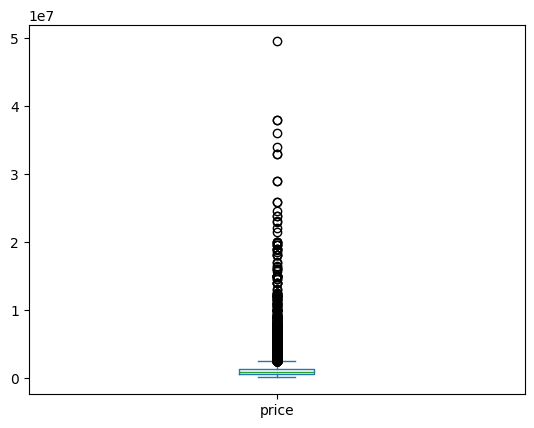

In [27]:
df['price'].plot(kind="box")

In [28]:
rows_to_remove = df[df['price'] >= 5000000].index

In [29]:
rows_to_remove

Index([ 131,  208,  269,  308,  333,  342,  354,  369,  422,  439,
       ...
       6341, 6407, 6501, 6827, 6828, 6878, 6934, 6965, 7022, 7093],
      dtype='int64', length=288)

In [30]:
df.drop(index=rows_to_remove,inplace = True)

In [31]:
df.head()

,beds,baths,sqft,parking_total_spaces,walk_score,middle_school_distance,wind_risk,mobility_score,parking_quality_score,has_garage,price,property_type_single family,property_type_townhouse,county_Berkshire,county_Bristol,county_Dukes,county_Essex,county_Franklin,county_Hampden,county_Hampshire,county_Middlesex,county_Nantucket,county_Norfolk,county_Other,county_Plymouth,county_Suffolk,county_Worcester,region_freq
0,3.0,2.0,1415.0,4.0,81.0,0.4,6.0,73.0,0.0,0,999000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
1,2.0,1.0,1064.0,3.0,69.0,0.1,6.0,65.0,1.0,0,799000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
2,2.0,1.0,1628.0,5.0,32.0,0.2,6.0,33.2,0.0,0,899000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
3,3.0,2.0,1824.0,2.0,84.0,0.7,6.0,72.0,0.0,0,998000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38
4,2.0,2.0,1221.0,1.0,77.0,0.1,6.0,84.6,1.0,0,668000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,38


In [32]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [33]:
X

array([[3.000e+00, 2.000e+00, 1.415e+03, ..., 0.000e+00, 0.000e+00,
        3.800e+01],
       [2.000e+00, 1.000e+00, 1.064e+03, ..., 0.000e+00, 0.000e+00,
        3.800e+01],
       [2.000e+00, 1.000e+00, 1.628e+03, ..., 0.000e+00, 0.000e+00,
        3.800e+01],
       ...,
       [3.000e+00, 1.000e+00, 9.660e+02, ..., 0.000e+00, 0.000e+00,
        1.570e+02],
       [3.000e+00, 1.000e+00, 1.136e+03, ..., 0.000e+00, 0.000e+00,
        1.570e+02],
       [2.000e+00, 1.000e+00, 9.940e+02, ..., 0.000e+00, 0.000e+00,
        1.570e+02]])

In [34]:
y

array([999000, 799000, 899000, ..., 289900, 207400, 239900])

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
X_train.shape


(6003, 27)

In [37]:
y_train.shape

(6003,)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Scale both X and y -> this is because the price target is very big. NN are very sensitive so i am changing it
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Neural Network

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:
X_train_scaled.shape

(6003, 27)

In [42]:
y_train_scaled.shape

(6003, 1)

In [43]:
model = Sequential()

model.add(Dense(10, activation='relu',input_dim=27))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [52]:
model.fit(X_train_scaled,y_train_scaled, epochs=100)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2207 - mae: 0.2881 - mse: 0.2207
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2279 - mae: 0.2966 - mse: 0.2279
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2539 - mae: 0.3069 - mse: 0.2539
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2324 - mae: 0.2970 - mse: 0.2324
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2306 - mae: 0.2954 - mse: 0.2306
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2296 - mae: 0.2953 - mse: 0.2296
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2182 - mae: 0.2905 - mse: 0.2182
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2332 - mae: 0.2967 - mse: 0.2332
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2283 - mae: 0.2913 - mse: 0.2283
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2379 - mae: 0.2987 - mse: 0.2379
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━

In [47]:
# Evaluate
model.evaluate(X_test_scaled, y_test_scaled)

# Predict and convert back to real prices
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test_scaled)

# Check real MAE in dollars
from sklearn.metrics import mean_absolute_error, r2_score

print(f"MAE: ${mean_absolute_error(y_actual, y_pred):,.0f}")
print(f"R2 Score: {r2_score(y_actual, y_pred):.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2863 - mae: 0.3340 - mse: 0.2863
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: $272,764
R2 Score: 0.7252


<Axes: >

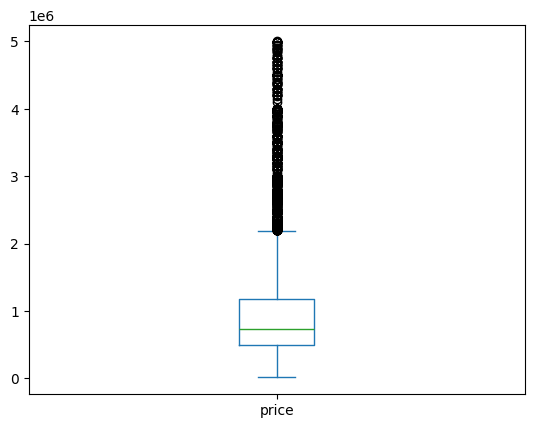

In [48]:
df['price'].plot(kind=('box'))

In [53]:
X_train_scaled.shape

(6003, 27)

In [49]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.9 MB/s eta 0:00:00


In [65]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [75]:
def build_model(hp):

  model = Sequential()
  # Input layer
  model.add(Dense(
      units = hp.Int('input_units', min_value = 32, max_value=512, step=32),
      activation='relu',
      input_shape=(X_train_scaled.shape[1],)
  ))

  # Tuning number of hidden layers
  for i in range(hp.Int('num_layers', 1,4)):
    model.add(Dense(
        units = hp.Int(f'units{i}', min_value=16, max_value=256, step = 16),
        activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    ))

  # output layer

  model.add(Dense(1, activation='linear'))

  model.compile(
      optimizer=Adam(hp.Float('learning_rate',0.0001,0.001, sampling='log')),
      loss='mse',
      metrics=['mae']
  )

  return model

In [76]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=30,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='housing_ann'
)

# early stoping callback
early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
tuner.search(
    X_train_scaled,y_train_scaled,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    validation_data=(X_test_scaled,y_test_scaled)
)

Trial 30 Complete [00h 00m 41s]
val_mae: 0.3172188401222229

Best val_mae So Far: 0.29591190814971924
Total elapsed time: 00h 16m 08s


In [81]:
best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp.values)

{'input_units': 448, 'num_layers': 4, 'units0': 192, 'activation': 'relu', 'learning_rate': 0.0009010391660510934, 'units1': 128, 'units2': 48, 'units3': 208}


In [80]:
# 6. Build and train best model
best_model = tuner.get_best_models()[0]

# 7. Evaluate
best_model.evaluate(X_test_scaled, y_test_scaled)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2723 - mae: 0.3018


[0.26352307200431824, 0.29591190814971924]